In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns' , None)

In [4]:
#hotelbookingdemand
df=pd.read_csv("hotel_bookings.csv")

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#check for any duplicate values
df.duplicated() .sum()

31994

In [8]:
duplicate = df[df.duplicated()]
duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [9]:
df_New=pd.DataFrame.drop_duplicates(df)

In [10]:
df_New.duplicated().sum()

0

In [11]:
#check for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df.drop('agent', axis=1, inplace=True)
df.drop('company', axis=1, inplace=True)

Number of bookings made in both the hotels.

In [14]:
print(df.hotel.value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


We have data only for 2 hotels namely Resort Hotel and City Hotel. Also, City Hotel has almost twice the number of bookings made in comparision to Resort Hotel

In [35]:
df= df.fillna(0)

In which month Hotel Booking is in demand for Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

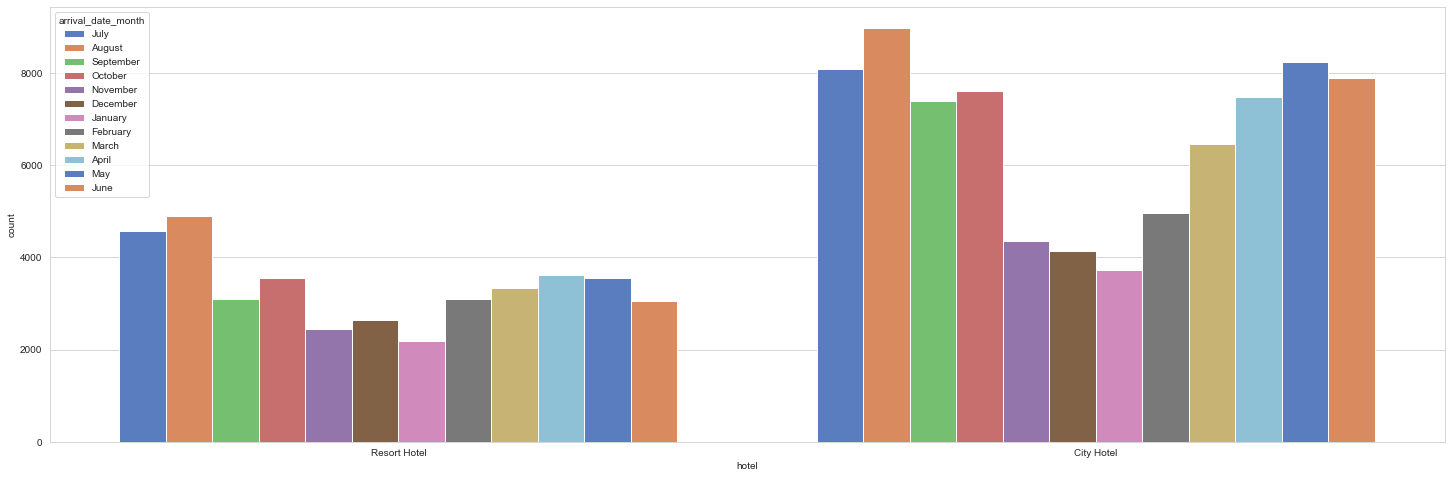

In [36]:
f,ax=plt.subplots(1,1,figsize=(25,8))
sns.countplot(x="hotel",hue="arrival_date_month",data=df,palette="muted")

In which hotel booking canclation is more?

<AxesSubplot:xlabel='hotel', ylabel='count'>

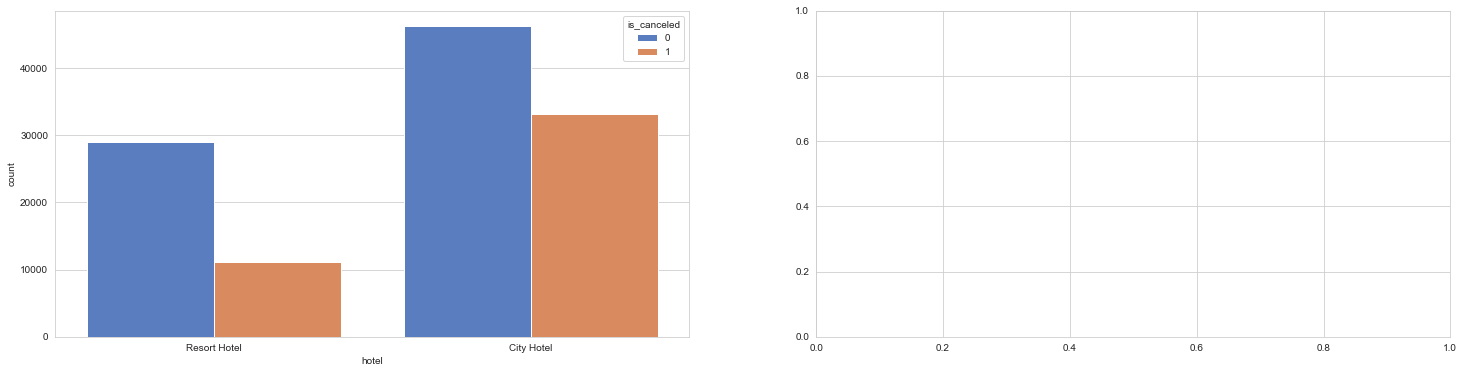

In [37]:
f,ax=plt.subplots(1,2,figsize=(25,6))

sns.countplot(x="hotel",hue="is_canceled",data=df,ax=ax[0], palette="muted")

Reservation Status in Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

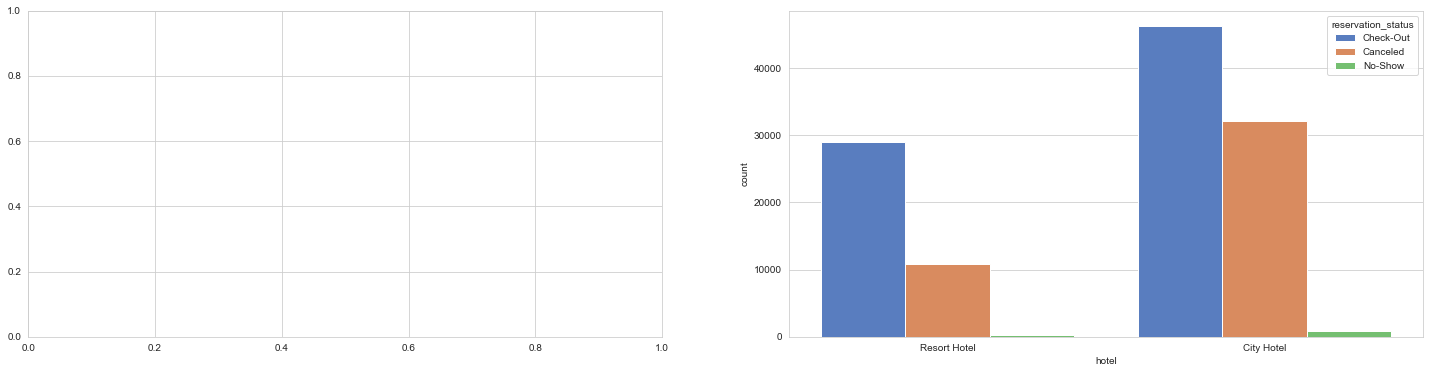

In [39]:
f,ax=plt.subplots(1,2,figsize=(25,6))
sns.countplot(x="hotel",hue="reservation_status",data=df,ax=ax[1], palette="muted")

Comparison of Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

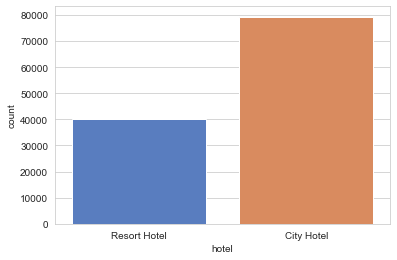

In [40]:
sns.countplot(x="hotel",data=df, palette="muted")

Percentage of adults,childrens,babies

<AxesSubplot:xlabel='hotel', ylabel='count'>

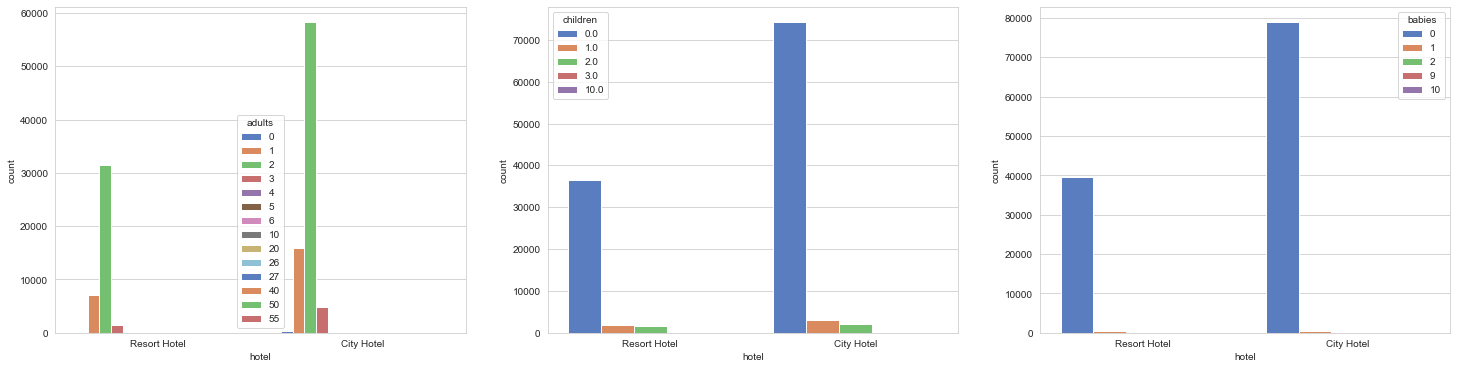

In [41]:
f,ax=plt.subplots(1,3,figsize=(25,6))
sns.countplot(x="hotel",hue="adults",data=df,ax=ax[0], palette="muted")
sns.countplot(x="hotel",hue="children",data=df,ax=ax[1], palette="muted")
sns.countplot(x="hotel",hue="babies",data=df,ax=ax[2], palette="muted")

Meals in Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

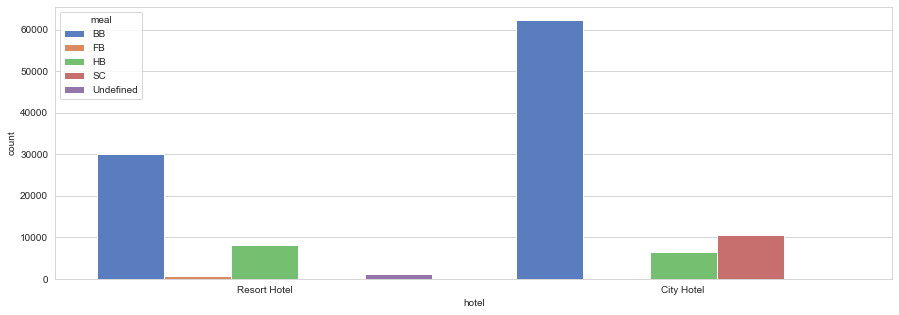

In [42]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="hotel",hue="meal",data=df, palette="muted")

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

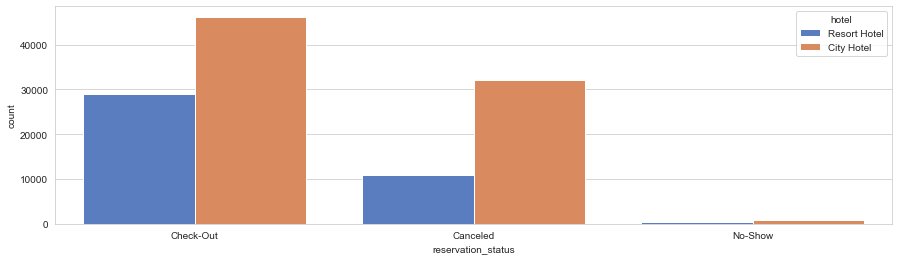

In [43]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="reservation_status",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

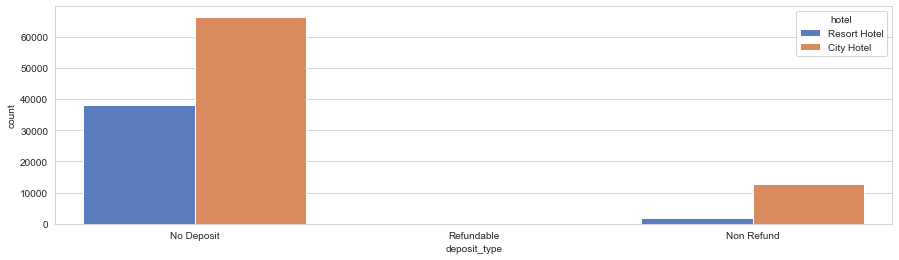

In [44]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="deposit_type",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='customer_type', ylabel='count'>

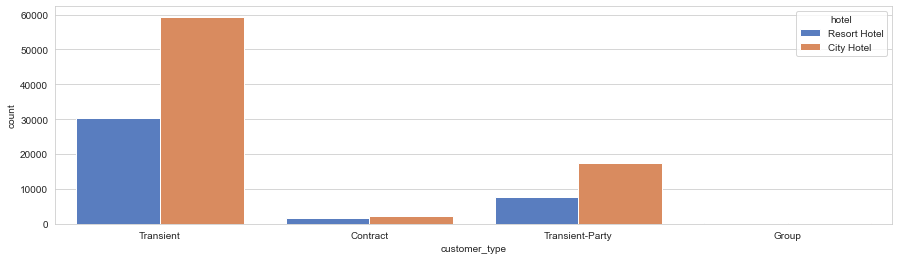

In [45]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="customer_type",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='market_segment', ylabel='count'>

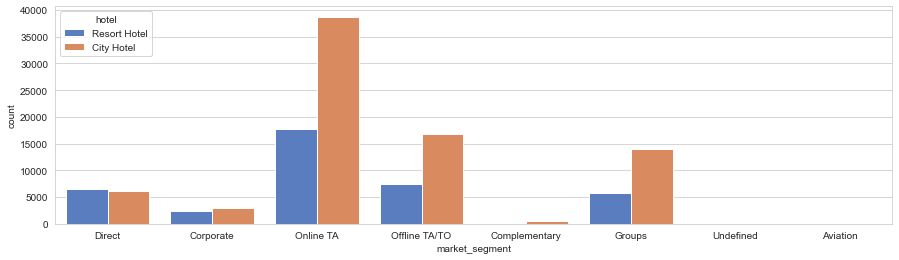

In [46]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="market_segment",hue="hotel",data=df, palette="muted")


Which countries tourists visiting hotel


<AxesSubplot:xlabel='country', ylabel='count'>

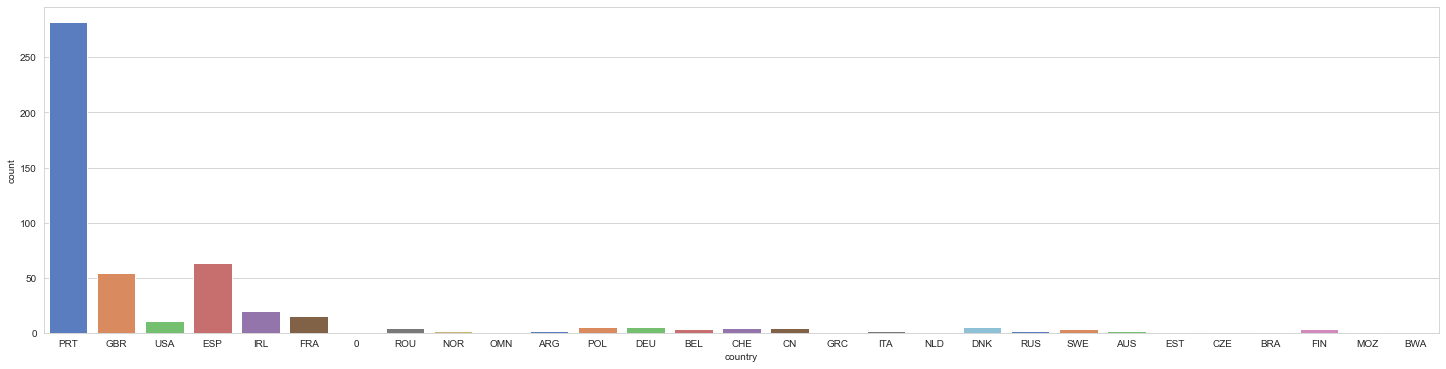

In [47]:
f,ax=plt.subplots(1,1,figsize=(25,6))
sns.countplot(x="country",data=df.head(500), palette="muted")

In which months more tourists visits more

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

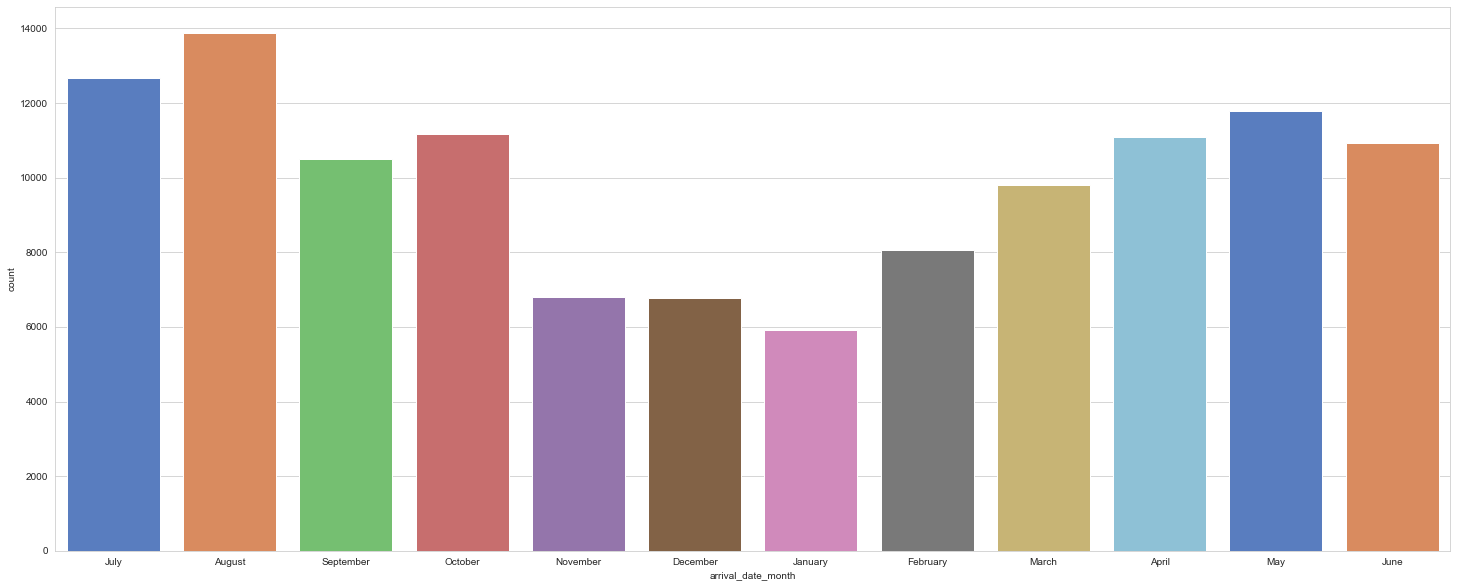

In [49]:
f,ax=plt.subplots(1,1,figsize=(25,10))
sns.countplot(x="arrival_date_month",data=df, palette="muted")

1.Determining Customer type

2.Reserved Room type

3.Assigned Room type

4.Distribution type



<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

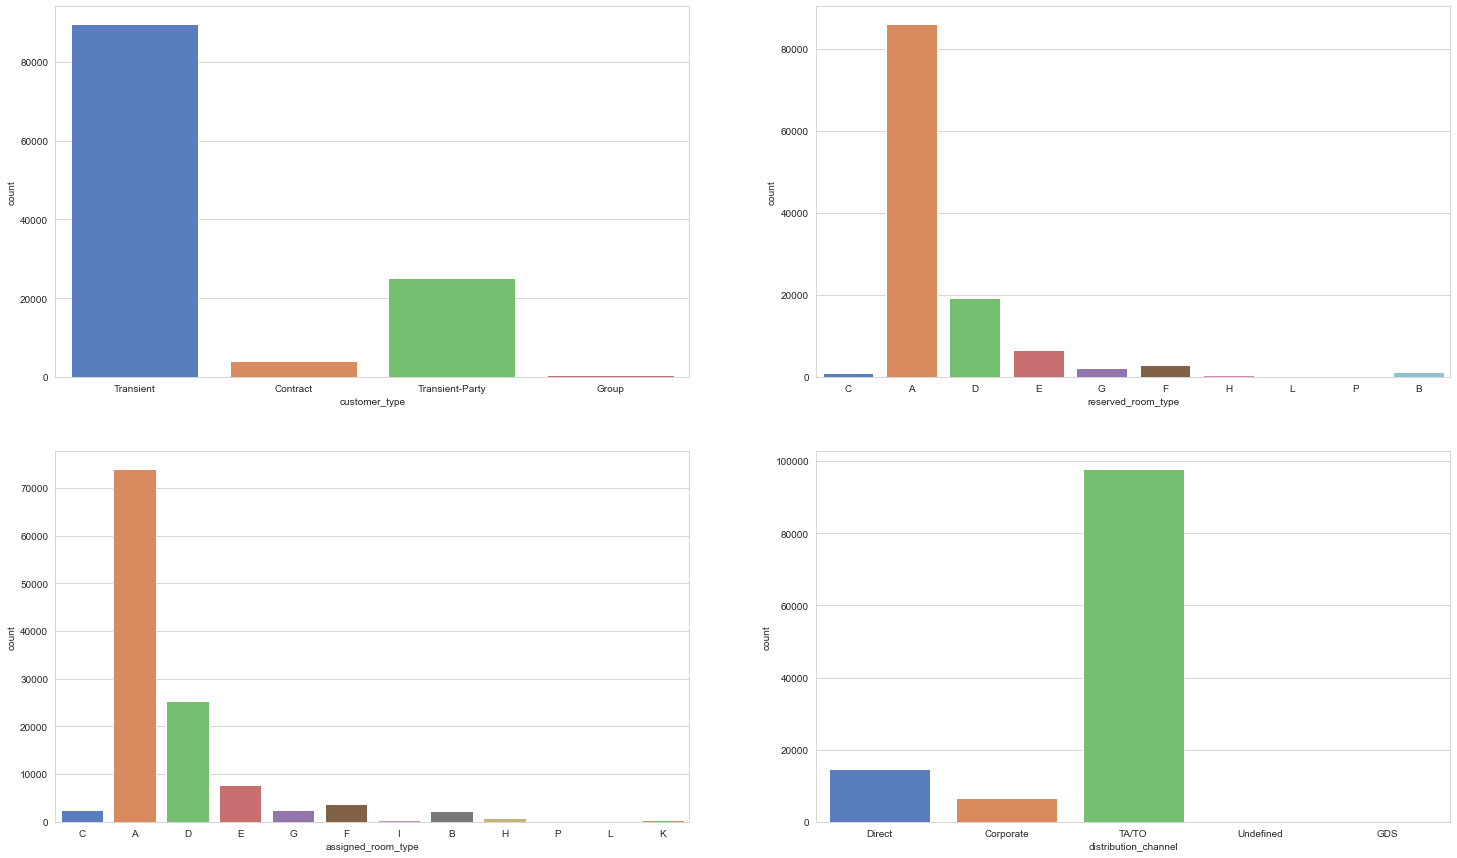

In [50]:
f,ax=plt.subplots(2,2,figsize=(25,15))
sns.countplot(x="customer_type",data=df,palette="muted",ax=ax[0][0])
sns.countplot(x="reserved_room_type",data=df,palette="muted",ax=ax[0][1])
sns.countplot(x="assigned_room_type",data=df,palette="muted",ax=ax[1][0])
sns.countplot(x="distribution_channel",data=df,palette="muted",ax=ax[1][1])

1.Required Car Parking Spaces

2.Total number of special requests

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

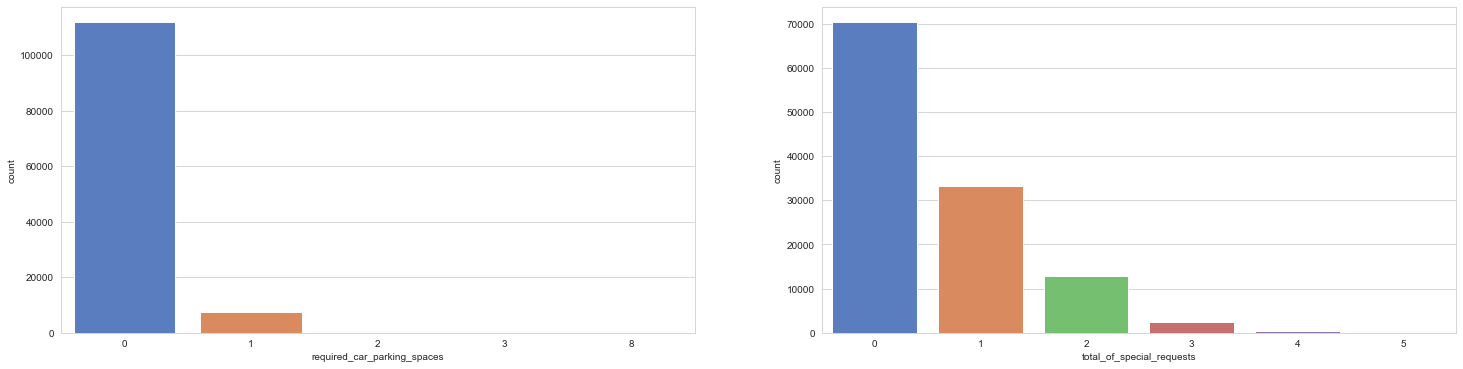

In [51]:
f,ax=plt.subplots(1,2,figsize=(25,6))
sns.countplot(x="required_car_parking_spaces",data=df,palette="muted",ax=ax[0])
sns.countplot(x="total_of_special_requests",data=df,palette="muted",ax=ax[1])

#Which countries have highest percentage of customers.

In [15]:
# Only non cancelled bookings included 
guests_per_country = df[df.is_canceled == 0].groupby('country').hotel.count().sort_values(ascending = False)
guests_per_country = guests_per_country.reset_index()
guests_per_country.rename(columns = {'hotel' : 'bookings'}, inplace = True)

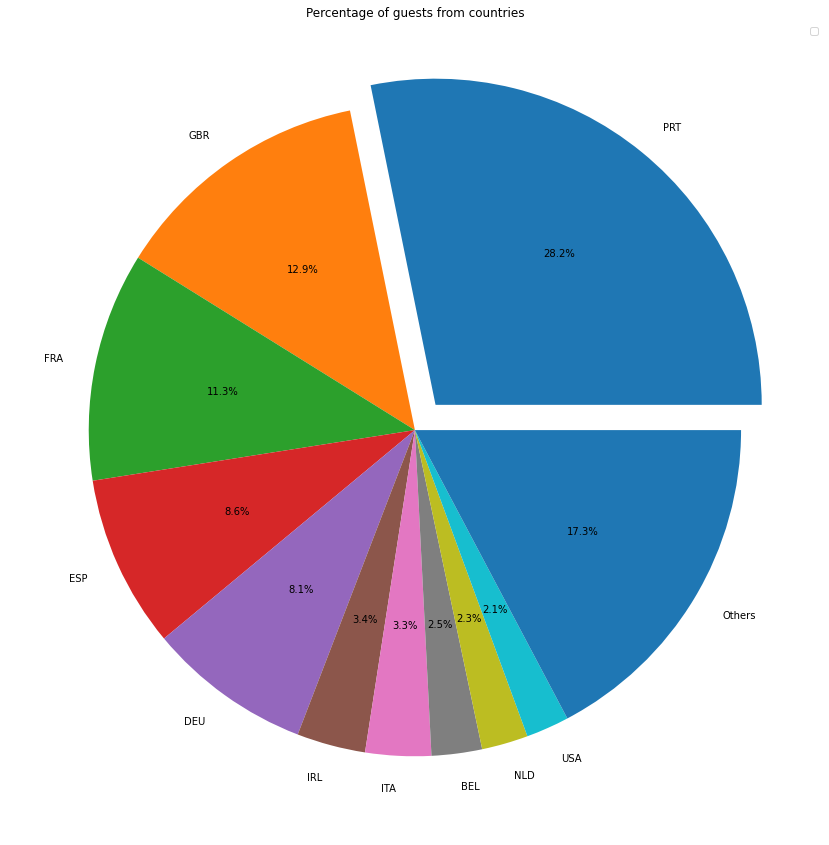

In [16]:
# The top 10 countries with highest number of bookings
guests_per_country_top_10 = guests_per_country[:10].copy()

# Others countries bookings combined
new_row = pd.DataFrame(data = { 'country' : ['Others'],
                                'bookings' : [guests_per_country['bookings'][10:].sum()]
                                })

guests_per_country = pd.concat([guests_per_country_top_10, new_row])


#Pie chart Plot
fig = plt.figure(figsize =(15, 15)) 
plt.title("Percentage of guests from countries")
plt.legend(guests_per_country.index, loc="best")
plt.pie(guests_per_country.bookings , autopct='%1.1f%%', labels=guests_per_country.country , explode =(0.1,0,0,0,0,0,0,0,0,0,0));

It is observed that highest number of booking are made by guests from Portugal. Also, Majority of bookings came through customers from Europe.

What percentage of total booking are cancelled.

In [17]:
print('{0:.2f}% of all bookings are cancelled.'.format(df.is_canceled.value_counts()[1]*100/df.is_canceled.count()))

37.04% of all bookings are cancelled.


For our time analysis we will convert 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' into a single date column "arrival_date"

In [18]:
from datetime import *

df['arrival_date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['arrival_date_year'],x['arrival_date_month'], x['arrival_date_day_of_month']), "%Y %B %d"),axis=1)
df[["arrival_date", "arrival_date_day_of_month","arrival_date_month","arrival_date_year"]].sample(5)

,arrival_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year
117942,2017-08-07,7,August,2017
68865,2017-05-22,22,May,2017
87528,2016-04-21,21,April,2016
83638,2016-02-05,5,February,2016
72941,2017-08-10,10,August,2017


 Total number of bookings made per month.

      arrival_date  hotel month_year
11       July-2015   2776 2015-07-01
2      August-2015   3889 2015-08-01
24  September-2015   5114 2015-09-01
22    October-2015   4957 2015-10-01
20   November-2015   2340 2015-11-01


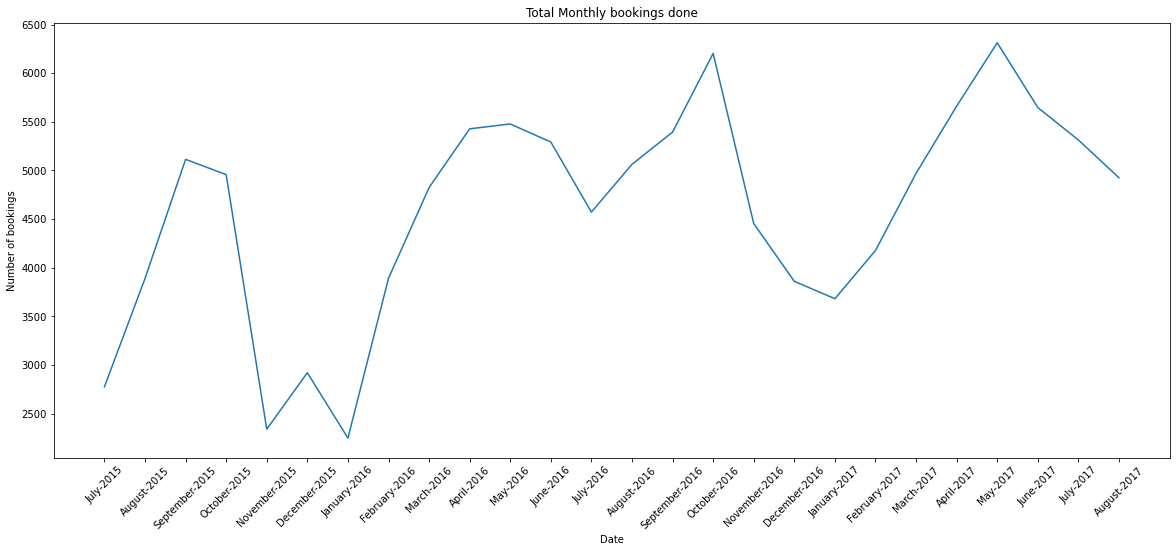

In [19]:
# Get total monthly bookings
bookings_per_month = df.groupby(df['arrival_date'].dt.strftime('%B-%Y')).count().hotel  # convert arrival date to month-year format to count total no of bookings in a month
bookings_per_month = bookings_per_month.reset_index()

bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert month-year to datetime and create new column to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  

print(bookings_per_month.head())


# Plot monthly bookings 

plt.figure(figsize=(20, 8))
plt.title("Total Monthly bookings done")
plt.xlabel("Date")
plt.ylabel("Number of bookings")
plt.plot(bookings_per_month.arrival_date , bookings_per_month.hotel);
plt.xticks(rotation=45);


Total number of bookings by each hotel

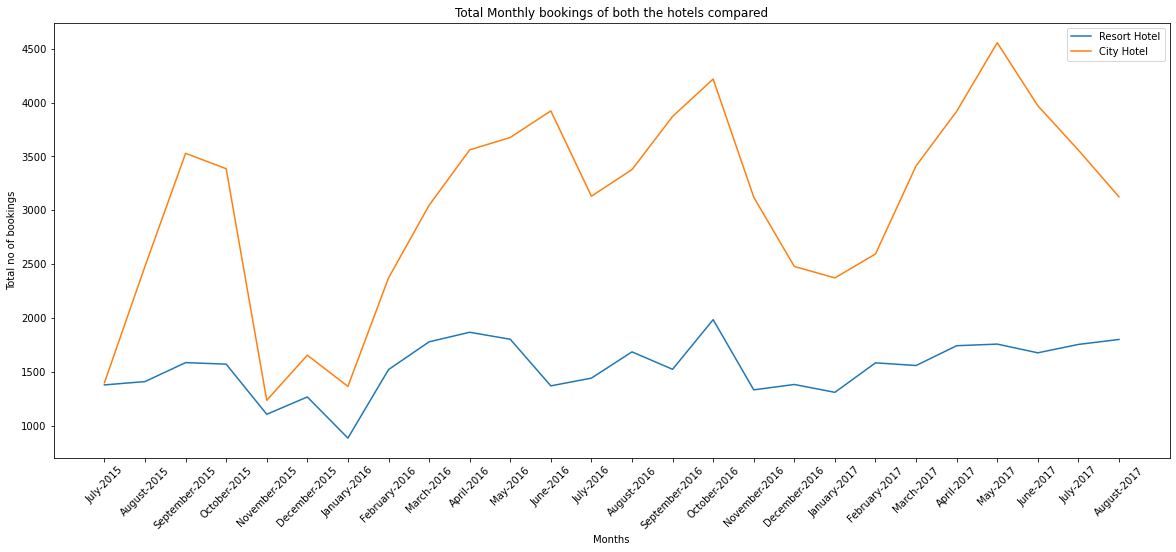

In [20]:
bookings_per_month = df.groupby(['hotel',  df['arrival_date'].dt.strftime('%B-%Y')]).count().lead_time
bookings_per_month = bookings_per_month.reset_index()
bookings_per_month.rename(columns = {'lead_time':'bookings'} , inplace = True)
bookings_per_month
bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert to datetime to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  
# print(bookings_per_month.head())

# bookings_per_month = bookings_per_month.unstack()
bookings_per_month_rh = bookings_per_month[bookings_per_month.hotel == 'Resort Hotel']
bookings_per_month_ch = bookings_per_month[bookings_per_month.hotel == 'City Hotel']


plt.figure(figsize=(20, 8))
plt.title("Total Monthly bookings of both the hotels compared")
plt.xlabel("Months")
plt.ylabel("Total no of bookings")
plt.plot(bookings_per_month_rh.arrival_date , bookings_per_month_rh.bookings);
plt.plot(bookings_per_month_ch.arrival_date , bookings_per_month_ch.bookings);
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=45);
                            



Bookings / Cancelled Bookings by different types of customers.

     customer_type  is_canceled  bookings
0         Contract            0      2814
1         Contract            1      1262
2            Group            0       518
3            Group            1        59
4        Transient            0     53099
5        Transient            1     36514
6  Transient-Party            0     18735
7  Transient-Party            1      6389


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


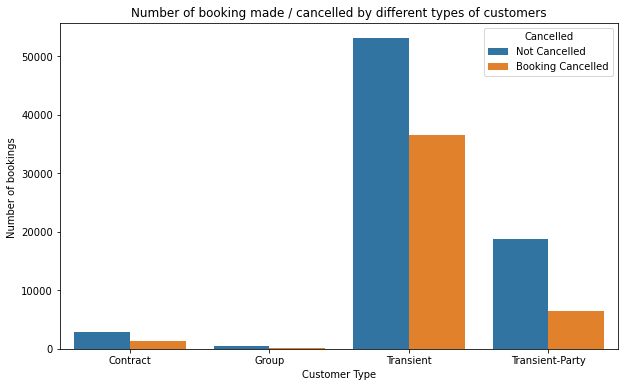

In [21]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');


Hotel preference by Customer type.

     customer_type         hotel  bookings
0         Contract    City Hotel      2300
1         Contract  Resort Hotel      1776
2            Group    City Hotel       293
3            Group  Resort Hotel       284
4        Transient    City Hotel     59404
5        Transient  Resort Hotel     30209
6  Transient-Party    City Hotel     17333
7  Transient-Party  Resort Hotel      7791


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


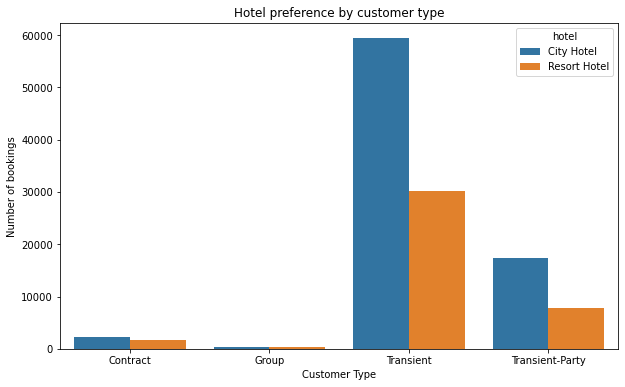

In [22]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','hotel']).count().lead_time.reset_index()
customer_bookings.rename(columns = {'lead_time':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

sns.barplot('customer_type', 'bookings', hue='hotel', data=customer_bookings );

plt.title("Hotel preference by customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings");

How many days in advance are most of the bookings made.

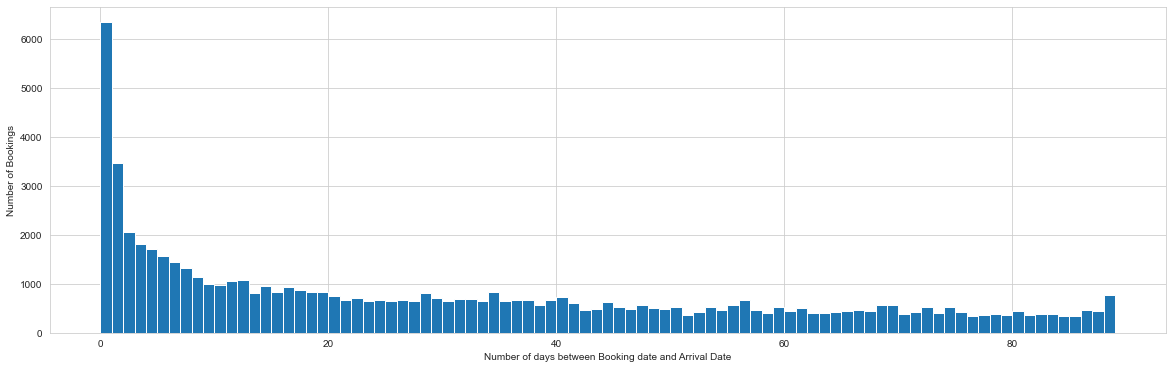

In [23]:
# df.lead_time
# Plot histogram for 90 days or 3 months of lead time

sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
plt.hist(df.lead_time, bins=np.arange(0, 90, 1));


plt.xlabel("Number of days between Booking date and Arrival Date")
plt.ylabel("Number of Bookings");

Meal preference by customers

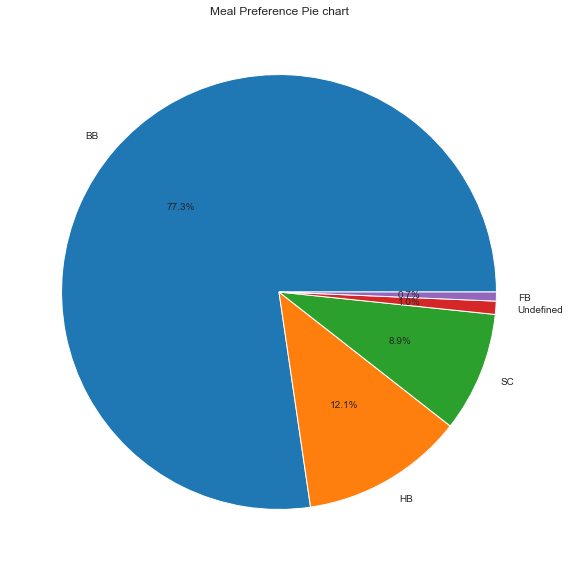

In [24]:
meal_preference = df.meal.value_counts()
meal_preference.index.name = "meal_type"
meal_preference = meal_preference.reset_index()
meal_preference

plt.figure(figsize = (15,10))
plt.pie(meal_preference.meal, autopct='%1.1f%%', labels=meal_preference.meal_type);

plt.title("Meal Preference Pie chart");

Deposit type prefered by Hotel for booking

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


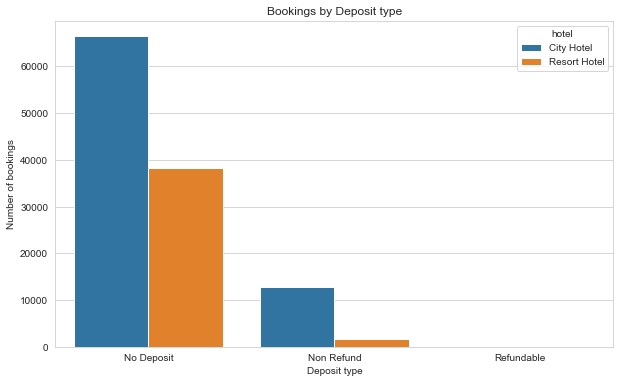

In [25]:
deposit_type_by_hotel  = df.groupby(["hotel","deposit_type"]).lead_time.count()
deposit_type_by_hotel = deposit_type_by_hotel.reset_index()
deposit_type_by_hotel.rename(columns = {"lead_time":"bookings"}, inplace = True)
deposit_type_by_hotel

plt.figure(figsize = (10,6))

sns.barplot('deposit_type', 'bookings', hue='hotel', data=deposit_type_by_hotel );
plt.title("Bookings by Deposit type")
plt.xlabel("Deposit type")
plt.ylabel("Number of bookings");

In [26]:
print('{0:.2f}% of all bookings are cancelled at City Hotel.'.format(df[df.hotel == "City Hotel"].is_canceled.sum() * 100 / df[df.hotel == "City Hotel"].is_canceled.count()))
print('{0:.2f}% of all bookings are cancelled at Resort Hotel.'.format(df[df.hotel == "Resort Hotel"].is_canceled.sum() * 100 / df[df.hotel == "Resort Hotel"].is_canceled.count()))

41.73% of all bookings are cancelled at City Hotel.
27.76% of all bookings are cancelled at Resort Hotel.


The bar chart above indicates that City Hotel offered most of its bookings without any initial deposit which maybe the reason for high booking cancellation percentage in comparision to Resort Hotel.

In [ ]:
project='hotel_booking_demand_course_project'